<a href="https://colab.research.google.com/github/smogjuwon/ResumeParser/blob/main/ResumeParser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U spacy
!pip install spacy_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 64.8 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.4
    Uninstalling spacy-3.8.4:
      Successfully uninstalled spacy-3.8.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.0/314.0 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.

In [ ]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

import json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cv_data = json.load(open('/content/drive/MyDrive/ResumeParser/dataset/dataset.json','r'))

In [ ]:
len(cv_data)

1014

In [ ]:
cv_data[0]

['\xa0 \xa0\nContact\nwww.linkedin.com/in/omjagri\n(LinkedIn)\nTop Skills\nphp\nMySQL\nJavaScript\nCertifications\nPhp & Js Om Prakash Jagri\nFull Stack Developer | PHP | Laravel | Vue Js\nKathmandu, Bāgmatī, Nepal\nSummary\nExperienced Developer with a demonstrated history of working in\nthe information technology and services industry. Skilled in Laravel,\nPHP, Cascading Style Sheets (CSS), JavaScript, vue js and MySQL.\nStrong engineering professional with a B.sc.CSIT(Bachelors of\nScience in Computer Science and Information Technology) focused\nin Computer Science from Tribhuvan University, Institute of Science\n& Tchnology. \nExperience\nSearchable Design LLC\nSoftware Developer\nJune 2021\xa0-\xa0Present\xa0 (1 year 7 months)\nNepal\nFull Stack Developer Laravel with Vue Js\nBenekiva\nTechnical Documentation\nSeptember 2021\xa0-\xa0Present\xa0 (1 year 4 months)\nUnited States\nBidhee\n3 years 9 months\nLaravel Developer\nMarch 2018\xa0-\xa0May 2021\xa0 (3 years 3 months)\nBaneswa

In [ ]:
!python -m spacy init fill-config /content/drive/MyDrive/ResumeParser/config/base_config.cfg /content/drive/MyDrive/ResumeParser/config/config.cfg

✔ Auto-filled config with all values
✔ Saved config
/content/drive/MyDrive/ResumeParser/config/config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
def get_spacy_doc(file,data):
    nlp = spacy.blank('en')
    db = DocBin()

    for text, annot in tqdm(data):
        doc = nlp.make_doc(text)
        annot = annot['entities']

        ents = []
        entity_indices = []

        for start, end, label in annot:
          skip_entity = False
          for idx in range(start, end):
            if idx in entity_indices:
              skip_entity = True
              break
          if skip_entity == True:
            continue

          entity_indices = entity_indices + list(range(start, end))

          try:
            span = doc.char_span(start, end, label=label, alignment_mode="strict")
          except:
            continue

          if span is None:
            err_data = str([start, end]) + "    " + str(text) + '\n'

            file.write(err_data)

          else:
            ents.append(span)
        try:
          doc.ents = ents
          db.add(doc)
        except:
          pass
    return db

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cv_data, test_size=0.3)

In [ ]:
file = open('/content/drive/MyDrive/ResumeParser/model/train_file.txt', 'w')
db = get_spacy_doc(file, train)
db.to_disk('/content/drive/MyDrive/ResumeParser/model/train_data.spacy')
db = get_spacy_doc(file, test)
db.to_disk('/content/drive/MyDrive/ResumeParser/model/test_data.spacy')
file.close()

100%|██████████| 305/305 [00:05<00:00, 52.25it/s]


In [ ]:
!python -m spacy train /content/drive/MyDrive/ResumeParser/config/config.cfg --output /content/drive/MyDrive/ResumeParser/model/output --paths.train /content/drive/MyDrive/ResumeParser/model/train_data.spacy --paths.dev /content/drive/MyDrive/ResumeParser/model/test_data.spacy --gpu-id 0

✔ Created output directory:
/content/drive/MyDrive/ResumeParser/model/output
ℹ Saving to output directory:
/content/drive/MyDrive/ResumeParser/model/output
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
tokenizer_config.json: 100% 25.0/25.0 [00:00<00:00, 195kB/s]
config.json: 100% 481/481 [00:00<00:00, 4.48MB/s]
vocab.json: 100% 899k/899k [00:00<00:00, 13.4MB/s]
merges.txt: 100% 456k/456k [00:00<00:00, 16.5MB/s]
tokenizer.json: 100% 1.36M/1.36M [00:00<00:00, 12.7MB/s]
2025-04-02 08:11:25.529684: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743581485.852196    2073 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743581485.935212    2073 cuda_blas.cc:1418] Unable to register cuBLAS factory: Att

In [ ]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load('/content/drive/MyDrive/ResumeParser/model/output/model-best')

In [ ]:
!sudo apt-get update
!sudo apt-get install -y tesseract-ocr
!pip install -U pypdfium2
!pip install pytesseract

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,686 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,793 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

In [ ]:
import pypdfium2 as pdfium
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [ ]:
def convert_pdf_to_images(file_path, scale=300/72):

    pdf_file = pdfium.PdfDocument(file_path)
    page_indices = [i for i in range(len(pdf_file))]

    renderer = pdf_file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images

In [ ]:
def display_images(list_dict_final_images):

    all_images = [list(data.values())[0] for data in list_dict_final_images]

    for index, image_bytes in enumerate(all_images):

        image = Image.open(BytesIO(image_bytes))
        figure = plt.figure(figsize = (image.width / 100, image.height / 100))

        plt.title(f"----- Page Number {index+1} -----")
        plt.imshow(image)
        plt.axis("off")
        plt.show()

In [ ]:
convert_pdf_to_images = convert_pdf_to_images("/content/drive/MyDrive/ResumeParser/test/OLUWASEUN GABRIEL OLORUNJU.pdf")

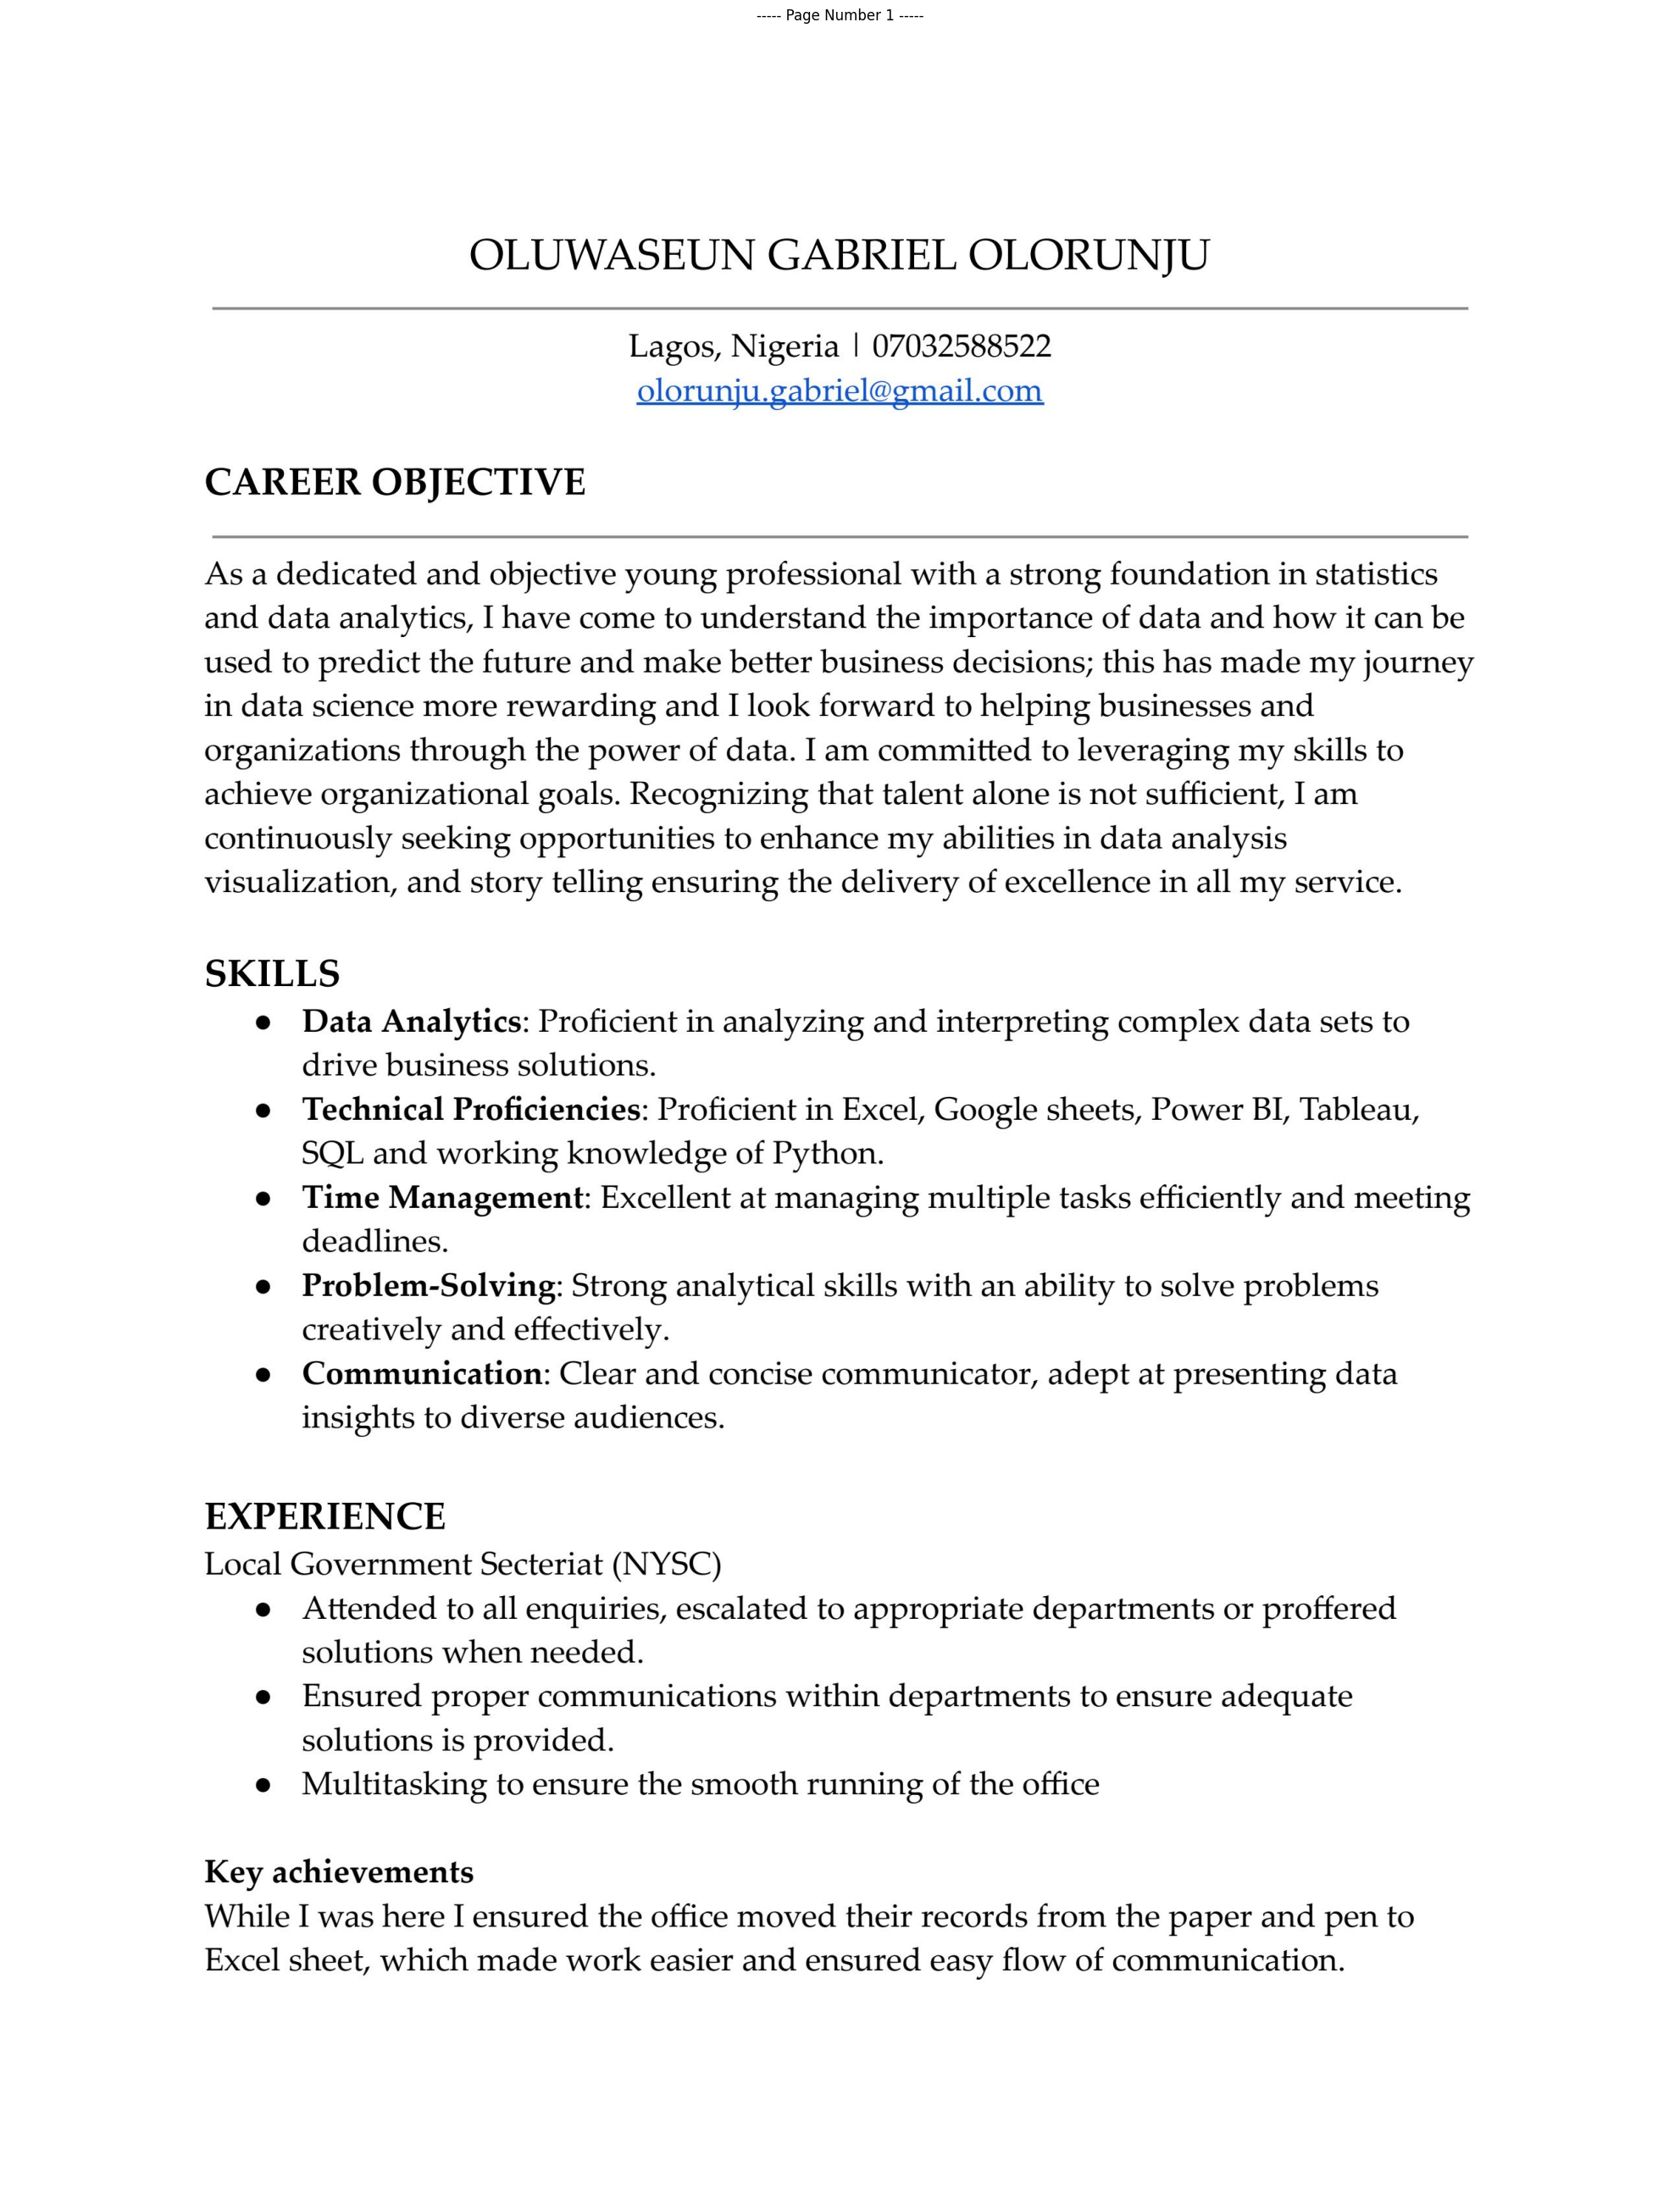

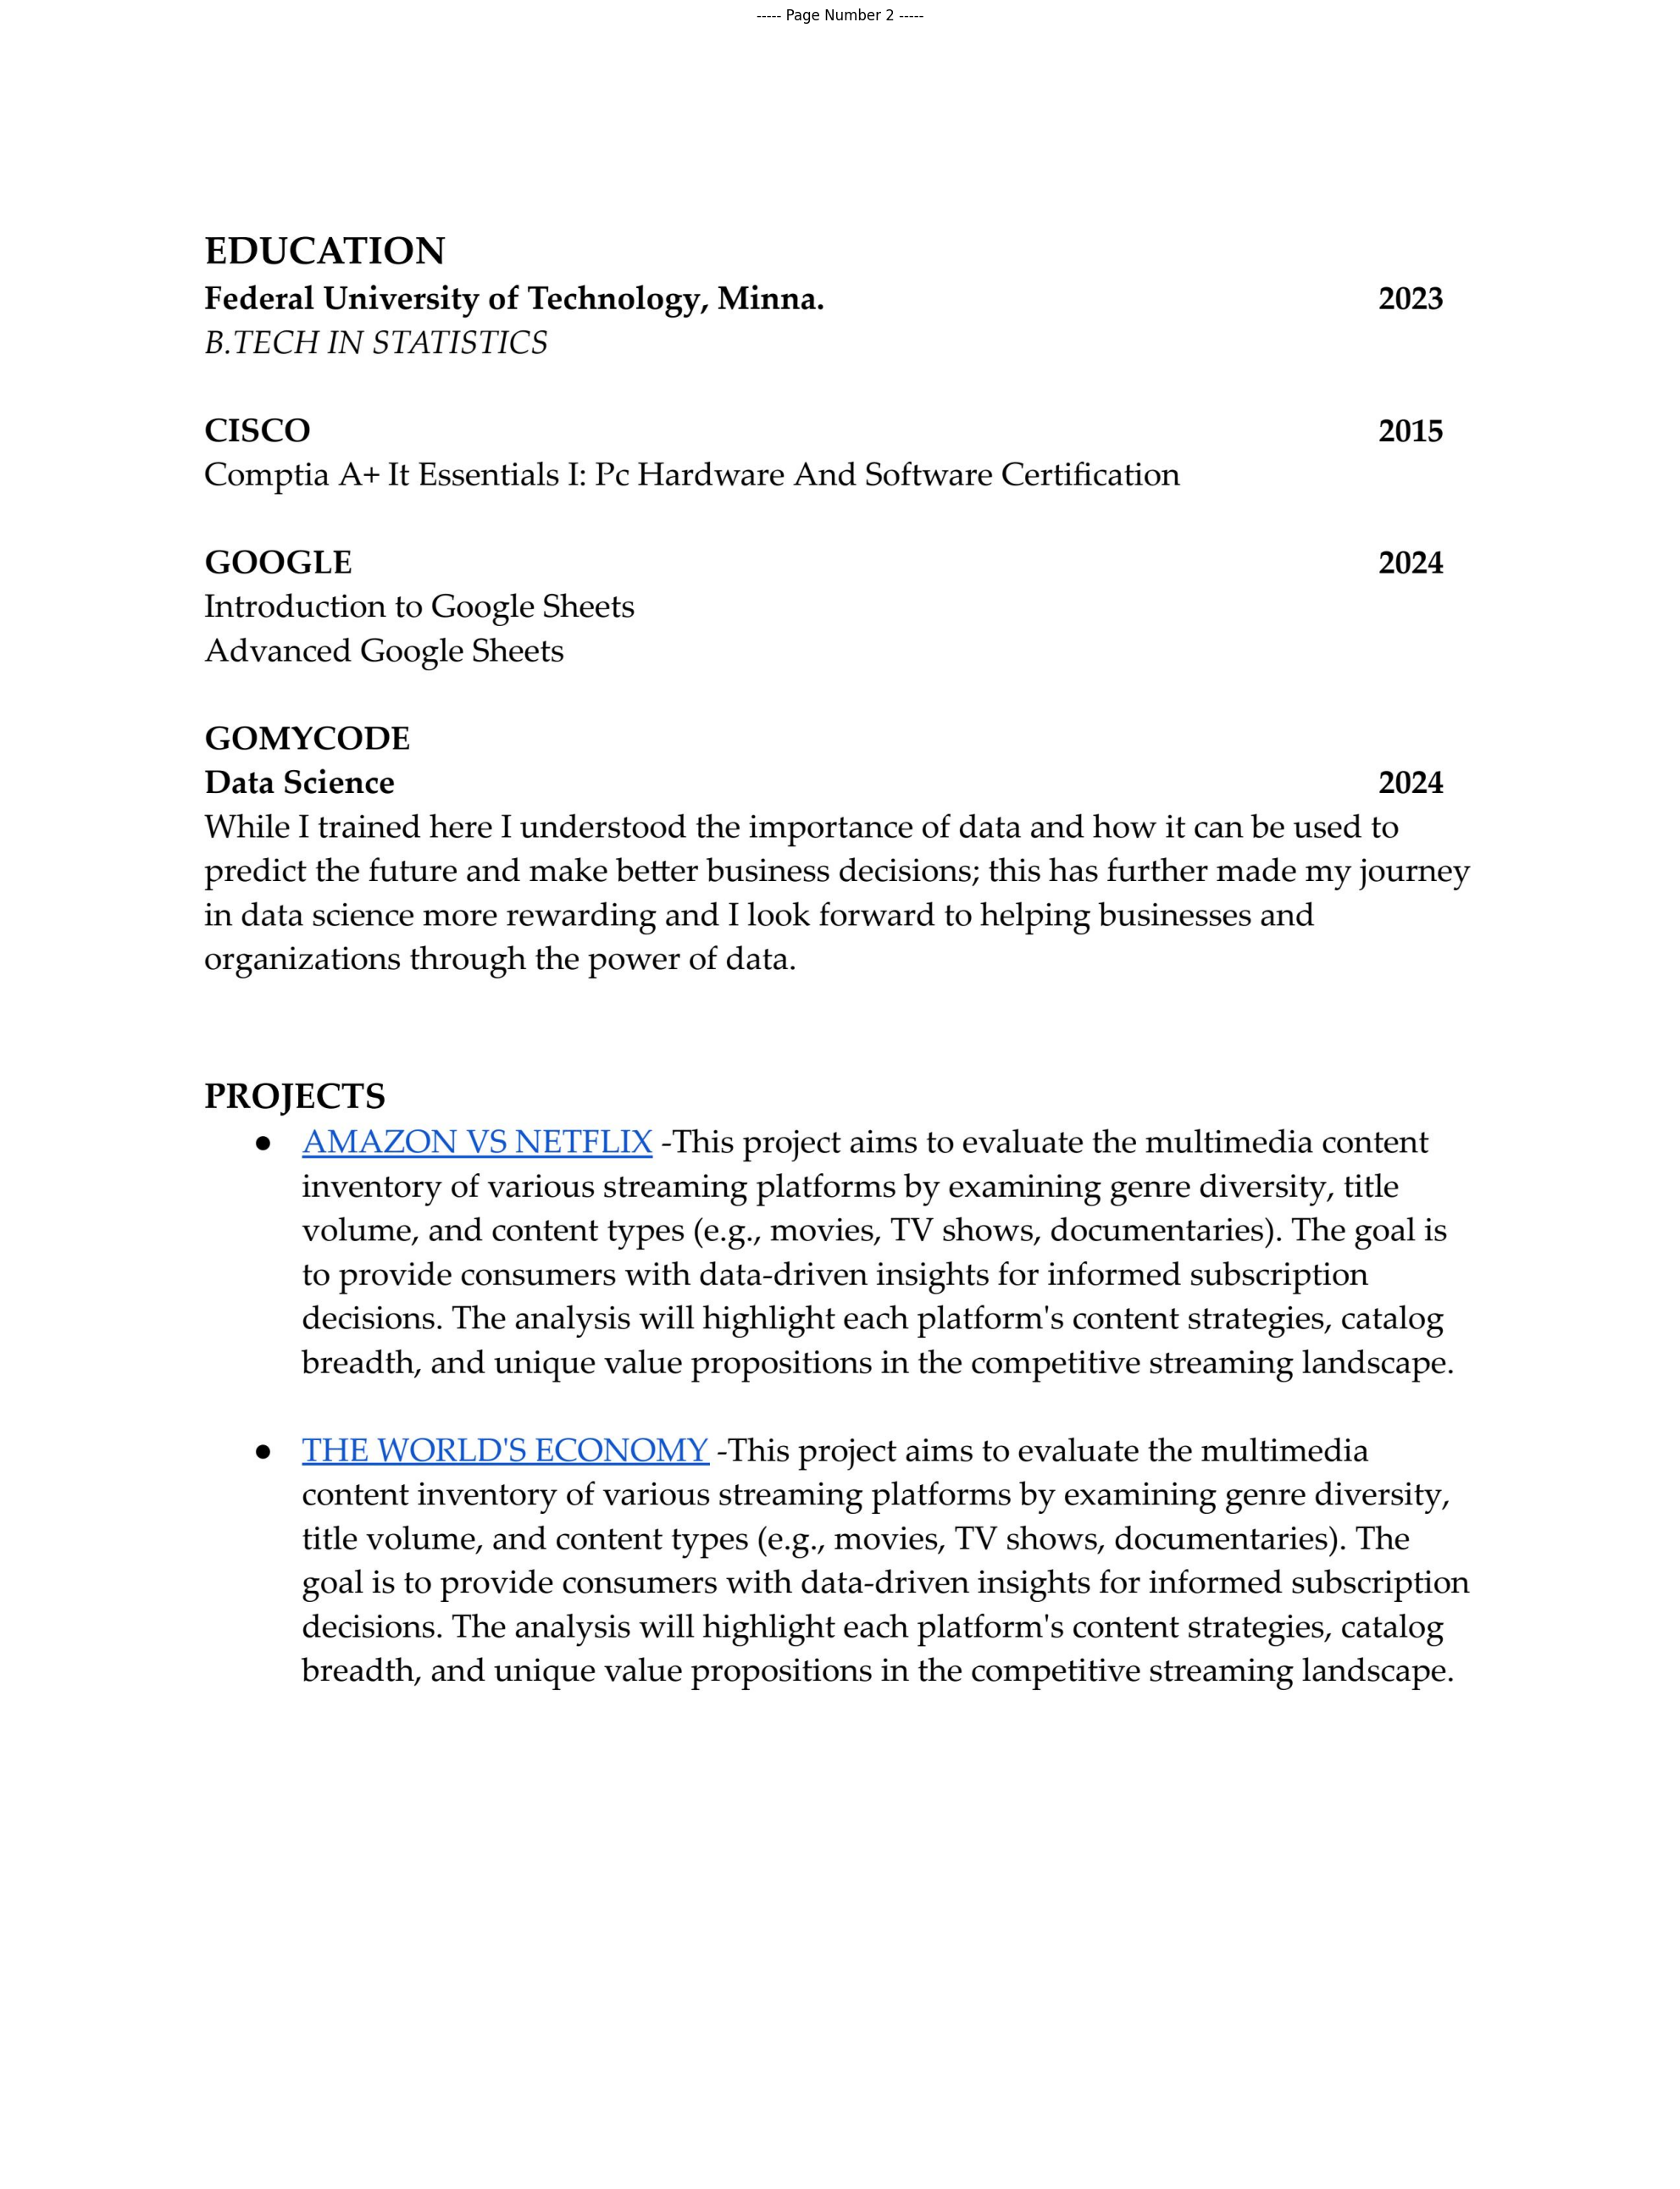

In [ ]:
display_images(convert_pdf_to_images)

In [ ]:
from pytesseract import image_to_string

In [ ]:
def extract_text_with_pytesseract(list_dict_final_images):

    image_list = [list(data.values())[0] for data in list_dict_final_images]
    image_content = []

    for index, image_bytes in enumerate(image_list):

        image = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(image))
        image_content.append(raw_text)

    return "\n".join(image_content)

In [ ]:
text = extract_text_with_pytesseract(convert_pdf_to_images)

print(text)

OLUWASEUN GABRIEL OLORUNJU

Lagos, Nigeria | 07032588522
olorunju.gabriel@gmail.com

CAREER OBJECTIVE

As a dedicated and objective young professional with a strong foundation in statistics
and data analytics, I have come to understand the importance of data and how it can be
used to predict the future and make better business decisions; this has made my journey
in data science more rewarding and I look forward to helping businesses and
organizations through the power of data. Iam committed to leveraging my skills to
achieve organizational goals. Recognizing that talent alone is not sufficient, Iam
continuously seeking opportunities to enhance my abilities in data analysis
visualization, and story telling ensuring the delivery of excellence in all my service.

SKILLS

e Data Analytics: Proficient in analyzing and interpreting complex data sets to
drive business solutions.

e Technical Proficiencies: Proficient in Excel, Google sheets, Power BI, Tableau,
SQL and working knowledge of Pyt

In [ ]:
doc = nlp(text)
for ent in doc.ents:
  print(ent.text,' : ', ent.label_)

Lagos, Nigeria  :  LOCATION
Federal University of Technology, Minna. 2023  :  UNIVERSITY
Comptia A+ It Essentials I: Pc Hardware And Software Certification  :  CERTIFICATION
GOOGLE 2024  :  CERTIFICATION
Introduction to Google Sheets  :  CERTIFICATION
Advanced Google Sheets

  :  CERTIFICATION
Data Science 2024  :  CERTIFICATION


In [ ]:
import pandas as pd

doc = nlp(text)


entity_dict = {}

# Extract entities and organize them by their label
for ent in doc.ents:
    if ent.label_ not in entity_dict:
        entity_dict[ent.label_] = []
    entity_dict[ent.label_].append(ent.text)

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(entity_dict, orient='index').transpose()

# Stack entities for each label in one column
df_stacked = df.apply(lambda x: ', '.join(x.dropna()), axis=0)

# Convert the stacked results into a DataFrame for display
df_stacked = pd.DataFrame(df_stacked).transpose()

# Show the resulting DataFrame
print(df_stacked)

# Optionally, save it to a CSV file
df_stacked.to_csv("stacked_entities_by_label.csv", index=False)

         LOCATION                                     UNIVERSITY  \
0  Lagos, Nigeria  Federal University of Technology, Minna. 2023   

                                       CERTIFICATION  
0  Comptia A+ It Essentials I: Pc Hardware And So...  


In [ ]:
import spacy

# `nlp` is your trained spaCy model
nlp.to_disk("/content/my_spacy_model")  # Save the model to a directory

# Optionally, zip the model directory to make downloading easier
import shutil
shutil.make_archive("/content/my_spacy_model", 'zip', '/content', 'my_spacy_model')


'/content/my_spacy_model.zip'

In [ ]:
from google.colab import files
files.download('/content/my_spacy_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import spacy
import pandas as pd
import pytesseract
import pypdfium2 as pdfium
from PIL import Image
import re
import streamlit as st
from io import BytesIO

@st.cache_resource
# Load your custom model
nlp = spacy.load('my_spacy_model')


# Function to process the PDF and extract text
def process_pdf(resume, scale=300/72):

    file = pdfium.PdfDocument(resume)
    page_indices = [i for i in range(len(file))]

    renderer = file.render(
        pdfium.PdfBitmap.to_pil,
        page_indices = page_indices,
        scale = scale,
    )

    list_final_images = []

    for i, image in zip(page_indices, renderer):

        image_byte_array = BytesIO()
        image.save(image_byte_array, format='jpeg', optimize=True)
        image_byte_array = image_byte_array.getvalue()
        list_final_images.append(dict({i:image_byte_array}))

    return list_final_images



# Specify the path to the Tesseract executable (replace with your actual path)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


from pytesseract import image_to_string
# Function to extract text from images using Tesseract
def extract_text_from_image(extract1):
    image_list = [list(data.values())[0] for data in extract1]
    image_content = []

    for index, image_bytes in enumerate(image_list):
        extract1 = Image.open(BytesIO(image_bytes))
        raw_text = str(image_to_string(extract1))
        image_content.append(raw_text)

    return "\n".join(image_content)


# Function to extract additional information using regex
def extract_info_with_regex(text):
    extracted_info = {}

    # Extract email addresses
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    extracted_info['Email'] = emails[0] if emails else None

    # Extract phone numbers (supports various formats)
    phones = re.findall(r'\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', text)
    extracted_info['Phone'] = phones[0] if phones else None

    # Extract LinkedIn profiles
    linkedin = re.findall(r'https?://(?:www\.)?linkedin\.com/in/[\w-]+', text)
    extracted_info['LinkedIn'] = linkedin[0] if linkedin else None

    # Extract first line (assuming it's the name)
    first_line = text.strip().split("\n")[0]

    # Predefined list of skills
    skills_list = ["Python", "Machine Learning", "NLP", "TensorFlow", "Communication", "SQL", "PowerBI", "Tableau",
                   "Teamwork"]

    # Extract skills by checking for matches in the skills list
    extracted_skills = [skill for skill in skills_list if skill in text]

    return extracted_info





# Function to perform NER with spaCy
def perform_ner(text):
    doc = nlp(text)
    entity_dict = {ent.label_: ent.text for ent in doc.ents}

    # Merge regex-extracted information
    entity_dict.update(extract_info_with_regex(text))

    return entity_dict


# Initialize or load stored DataFrame
if "resume_df" not in st.session_state:
    st.session_state.resume_df = pd.DataFrame()

# Streamlit UI
st.title("Resume Parser with Named Entity Recognition")
st.write("Upload a PDF resume to extract and store named entities.")

# File uploader
pdf_file = st.file_uploader("Choose a PDF file", type=["pdf"])

if pdf_file is not None:
    with st.spinner("Processing the PDF..."):
        image = process_pdf(pdf_file)
        extracted_text = extract_text_from_image(image)

    st.subheader("Extracted Text")
    st.text_area("Text from PDF", extracted_text, height=300)

    # Perform NER and store results
    entity_dict = perform_ner(extracted_text)

    if entity_dict:
        df_new = pd.DataFrame([entity_dict])
        st.session_state.resume_df = pd.concat([st.session_state.resume_df, df_new], ignore_index=True)
        st.success("Entities extracted and saved!")

    # Display stored resumes
    st.subheader("Stored Resumes")
    st.dataframe(st.session_state.resume_df)

    # Option to download CSV
    st.download_button(
        label="Download CSV",
        data=st.session_state.resume_df.to_csv(index=False).encode("utf-8"),
        file_name="parsed_resumes.csv",
        mime="text/csv",
    )
